# Import Libraries¶

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

 # Loading and viewing data

In [5]:
df = pd.read_csv(r"C:\Mypythonfiles\AQI_Airpollution.csv")
df.head()

,Date,Country,Status,AQI Value
0,21-07-2022,Albania,Good,14
1,21-07-2022,Algeria,Moderate,65
2,21-07-2022,Andorra,Moderate,55
3,21-07-2022,Angola,Unhealthy for Sensitive Groups,113
4,21-07-2022,Argentina,Moderate,63


 # info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18227 entries, 0 to 18226
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       18227 non-null  object
 1   Country    18227 non-null  object
 2   Status     18227 non-null  object
 3   AQI Value  18227 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 569.7+ KB


 # Seting date as Index

In [8]:
print(df[df['Date'].isna()])

Empty DataFrame
Columns: [Date, Country, Status, AQI Value]
Index: []


In [11]:
df['Date']=pd.to_datetime(df['Date'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18227 entries, 0 to 18226
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       18227 non-null  datetime64[ns]
 1   Country    18227 non-null  object        
 2   Status     18227 non-null  object        
 3   AQI Value  18227 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 569.7+ KB


In [12]:
df.set_index("Date",inplace = True)
df.head()

,Country,Status,AQI Value
Date,,,
2022-07-21,Albania,Good,14
2022-07-21,Algeria,Moderate,65
2022-07-21,Andorra,Moderate,55
2022-07-21,Angola,Unhealthy for Sensitive Groups,113
2022-07-21,Argentina,Moderate,63


# visualize

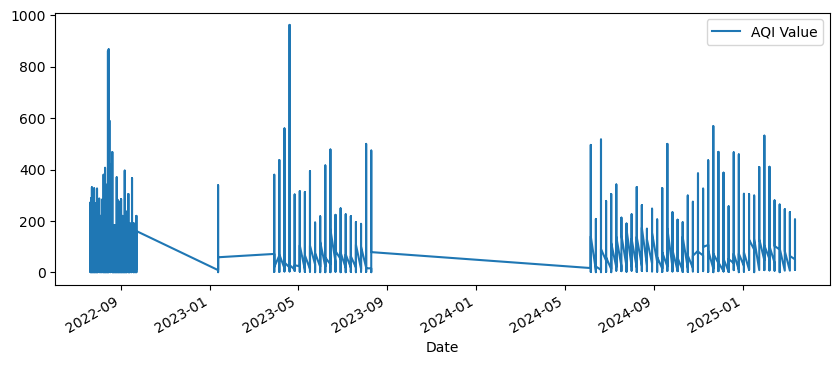

In [13]:
df.plot(figsize = (10,4), subplots = True)
plt.show()

1. The graph represents the AQI(Air quality index) values from mid of 2022 to 2025.
 - There are gaps in data where values drop to zero.
 - High AQI values are seen in mid-2022, early 2023, and mid-2024 with worsening air quality.
 - These spikes suggest poor air quality may be due to industrial activities.

# stationary Results

In [15]:
adfuller_result = adfuller(df['AQI Value'])
print(adfuller_result)

(-15.215400453061477, 5.579625689083851e-28, 45, 18181, {'1%': -3.4307097284809336, '5%': -2.86169898646948, '10%': -2.566854624305701}, 193290.32233171744)


In [16]:
if adfuller_result[1] < 0.05:
    print("Stationary")
else:
    print("Non - Stationary")

Stationary


# Decomposing

In [18]:
decomposing = seasonal_decompose(df['AQI Value'],model = 'additive',period = 365)

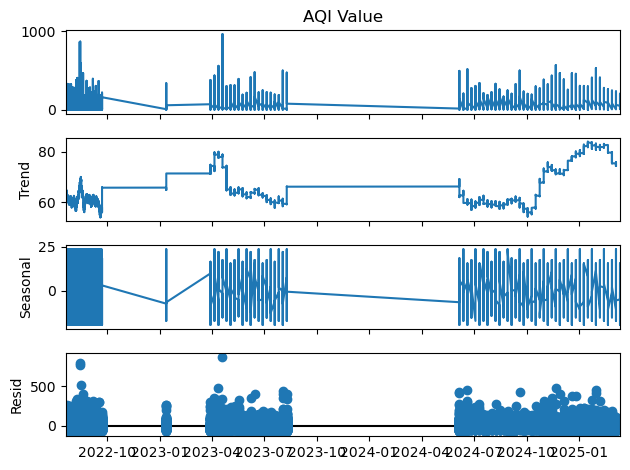

In [19]:
decomposing.plot()
plt.show()

Conclusion:
This decomposition of AQI (Air Quality Index) values provides:
 - AQI shows high fluctuations with significant spikes in certain periods.
 - Data gaps suggest missing values or temporary zero pollution periods.
1. Trend:
 - The overall AQI trend fluctuates over time.
 - There is an increase in AQI levels in 2024 onwards, indicating worsening of air quality.
 - A drop in AQI is seen in some regions, due to regulations.
2. seasonal:
 - This graph mainly tells the AQI values seasonal variations.
 - The air quality changes, possibly due to weather, festival crackers, or industrial gas release.
3. resid
 - This mainly outliers in the data.
 - Large variations indicate unexpected spikes in pollution.

# ARIMA

In [20]:
len(df)

18227

In [21]:
len(df)*0.8

14581.6

In [23]:
train = df.iloc[0:14581]
test = df.iloc[14581:]

In [24]:
mymodel = ARIMA(train['AQI Value'],order = (1,1,1))

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [25]:
mymodel = mymodel.fit()

In [26]:
forecast = mymodel.forecast(steps = len(test))
print(forecast)

14581    59.775437
14582    60.125750
14583    60.134658
14584    60.134885
14585    60.134891
           ...    
18222    60.134891
18223    60.134891
18224    60.134891
18225    60.134891
18226    60.134891
Name: predicted_mean, Length: 3646, dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [27]:
test['forecast'] = forecast
test.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_6660\2382496083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['forecast'] = forecast


,Country,Status,AQI Value,forecast
Date,,,,
2024-08-22,Croatia,Moderate,53,NaN
2024-08-22,Cyprus,Moderate,55,NaN
2024-08-22,Czech Republic,Good,49,NaN
2024-08-22,Denmark,Good,14,NaN
2024-08-22,Dominican Republic,Good,23,NaN


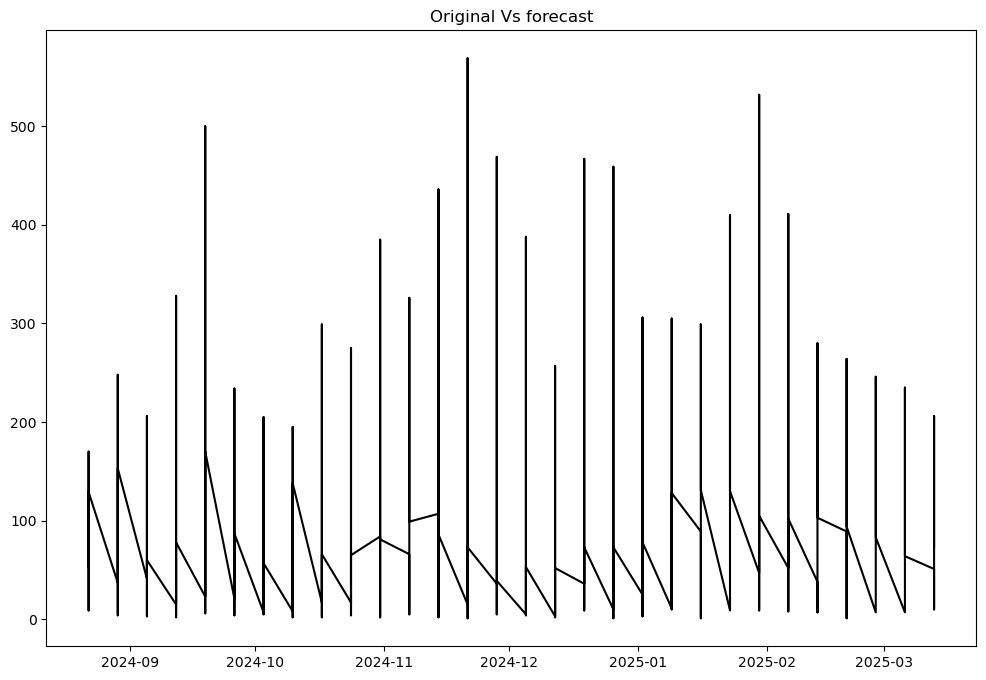

In [29]:
plt.figure(figsize=(12,8))
plt.plot(test.index,test['AQI Value'], color = 'k', label= 'original')
plt.plot(test.index,test['forecast'], color = 'hotpink', label = 'Forecast')
plt.title("Original Vs forecast")
plt.show()